In [1]:
import os
os.chdir('./data')

In [2]:
import pandas as pd
nurses_data = pd.read_excel("Nurses-Merged.csv")
nurses_data.head()

,ID,Start time,End time,duration,date,Stress level,COVID related,Treating a covid patient,Patient in Crisis,Patient or patient's family,Doctors or colleagues,"Administration, lab, pharmacy, radiology, or other ancilliary services\n",Increased Workload,Technology related stress,Lack of supplies,Documentation,Competency related stress,Saftey (physical or physiological threats),Work Environment - Physical or others: work processes or procedures,Description
0,5C,08:00:00,09:00:00,01:00:00,2020-04-15,1,0,1,0,1,0,0,0,0,0,0,0,0,0,na
1,5C,17:31:00,17:58:00,00:27:00,2020-04-14,1,0,1,0,1,0,0,1,0,0,0,0,0,0,na
2,E4,15:32:00,15:37:00,00:05:00,2020-04-18,2,0,1,0,1,0,0,0,0,0,0,0,0,0,Spoke with family regarding patient's decline ...
3,E4,14:05:00,14:11:00,00:06:00,2020-04-18,2,0,0,0,1,0,0,0,0,0,0,0,0,0,Was placing another FaceTime call to a patient...
4,7A,13:52:00,14:03:00,00:11:00,2020-04-18,2,0,1,0,0,0,0,1,0,0,0,0,0,1,na


In [3]:
#Replace 'na' values with NaN in the "Description" column
nurses_data['Description'].replace('na', pd.NA, inplace=True)
#Re-check for missing values
missing_values_updated = nurses_data.isnull().sum()
missing_values_updated

ID                                                                            0
Start time                                                                    0
End time                                                                      0
duration                                                                      0
date                                                                          0
Stress level                                                                  0
COVID related                                                                 0
Treating a covid patient                                                      0
Patient in Crisis                                                             0
Patient or patient's family                                                   0
Doctors or colleagues                                                         0
Administration, lab, pharmacy, radiology, or other ancilliary services\n      0
Increased Workload                      

In [4]:
# Impute missing values in the "Description" column
nurses_data['Description'].fillna("No description provided", inplace=True)
# Check the data types of the columns
column_data_types = nurses_data.dtypes
column_data_types

ID                                                                                  object
Start time                                                                          object
End time                                                                            object
duration                                                                            object
date                                                                        datetime64[ns]
Stress level                                                                        object
COVID related                                                                       object
Treating a covid patient                                                            object
Patient in Crisis                                                                   object
Patient or patient's family                                                         object
Doctors or colleagues                                                               object

In [5]:
#Convert Start time and End time to datetime format for calculation
nurses_data['Start datetime'] = pd.to_datetime(nurses_data['Start time'].astype(str))
nurses_data['End datetime'] = pd.to_datetime(nurses_data['End time'].astype(str))
#Calculate duration
nurses_data['calculated_duration'] = (nurses_data['End datetime'] - nurses_data['Start datetime']).dt.total_seconds() / 3600
#Drop temporary datetime columns
nurses_data.drop(['Start datetime', 'End datetime'], axis=1, inplace=True)
#Display the calculated duration along with the original duration for comparison
nurses_data[['duration', 'calculated_duration']].head()

,duration,calculated_duration
0,01:00:00,1.000000
1,00:27:00,0.450000
2,00:05:00,0.083333
3,00:06:00,0.100000
4,00:11:00,0.183333


In [6]:
#Defining potential binary columns
binary_columns = [
    'Stress level', 'COVID related', 'Treating a covid patient', 'Patient in Crisis',
    'Patient or patient\'s family', 'Doctors or colleagues',
    'Administration, lab, pharmacy, radiology, or other ancilliary services\n',
    'Increased Workload', 'Technology related stress', 'Lack of supplies', 'Documentation',
    'Competency related stress', 'Saftey (physical or physiological threats)',
    'Work Environment - Physical or others: work processes or procedures'
]
#Inspecting unique values of these columns
binary_columns_unique_values = {col: nurses_data[col].unique() for col in binary_columns}
binary_columns_unique_values

{'Stress level': array([1, 2, 'na', 0], dtype=object),
 'COVID related': array([0, 'na', 1], dtype=object),
 'Treating a covid patient': array([1, 0, 'na'], dtype=object),
 'Patient in Crisis': array([0, 'na', 1], dtype=object),
 "Patient or patient's family": array([1, 0, 'na'], dtype=object),
 'Doctors or colleagues': array([0, 'na', 1], dtype=object),
 'Administration, lab, pharmacy, radiology, or other ancilliary services\n': array([0, 'na', 1], dtype=object),
 'Increased Workload': array([0, 1, 'na'], dtype=object),
 'Technology related stress': array([0, 'na', 1], dtype=object),
 'Lack of supplies': array([0, 'na', 1], dtype=object),
 'Documentation': array([0, 'na', 1], dtype=object),
 'Competency related stress': array([0, 'na', 1], dtype=object),
 'Saftey (physical or physiological threats)': array([0, 'na', 1], dtype=object),
 'Work Environment - Physical or others: work processes or procedures': array([0, 1, 'na'], dtype=object)}

In [7]:
# Convert 'na' values to NaN for the potential binary columns
for col in binary_columns:
    nurses_data[col].replace('na', pd.NA, inplace=True)
# Check the number of missing values in these columns
missing_values_binary_columns = nurses_data[binary_columns].isnull().sum()
missing_values_binary_columns

Stress level                                                                113
COVID related                                                               113
Treating a covid patient                                                    113
Patient in Crisis                                                           113
Patient or patient's family                                                 113
Doctors or colleagues                                                       113
Administration, lab, pharmacy, radiology, or other ancilliary services\n    113
Increased Workload                                                          113
Technology related stress                                                   113
Lack of supplies                                                            113
Documentation                                                               113
Competency related stress                                                   113
Saftey (physical or physiological threat

In [8]:
from sklearn.model_selection import train_test_split
#Splitting the data into training and testing subsets
train_data, test_data = train_test_split(nurses_data, test_size=0.25, random_state=42)
#Impute missing values in the training set using mode
for col in binary_columns:
    mode_value = train_data[col].mode()[0]
    train_data[col].fillna(mode_value, inplace=True)
#Check if there are any missing values left in the training data
missing_values_train = train_data[binary_columns].isnull().sum()
missing_values_train

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Stress level                                                                0
COVID related                                                               0
Treating a covid patient                                                    0
Patient in Crisis                                                           0
Patient or patient's family                                                 0
Doctors or colleagues                                                       0
Administration, lab, pharmacy, radiology, or other ancilliary services\n    0
Increased Workload                                                          0
Technology related stress                                                   0
Lack of supplies                                                            0
Documentation                                                               0
Competency related stress                                                   0
Saftey (physical or physiological threats)                      

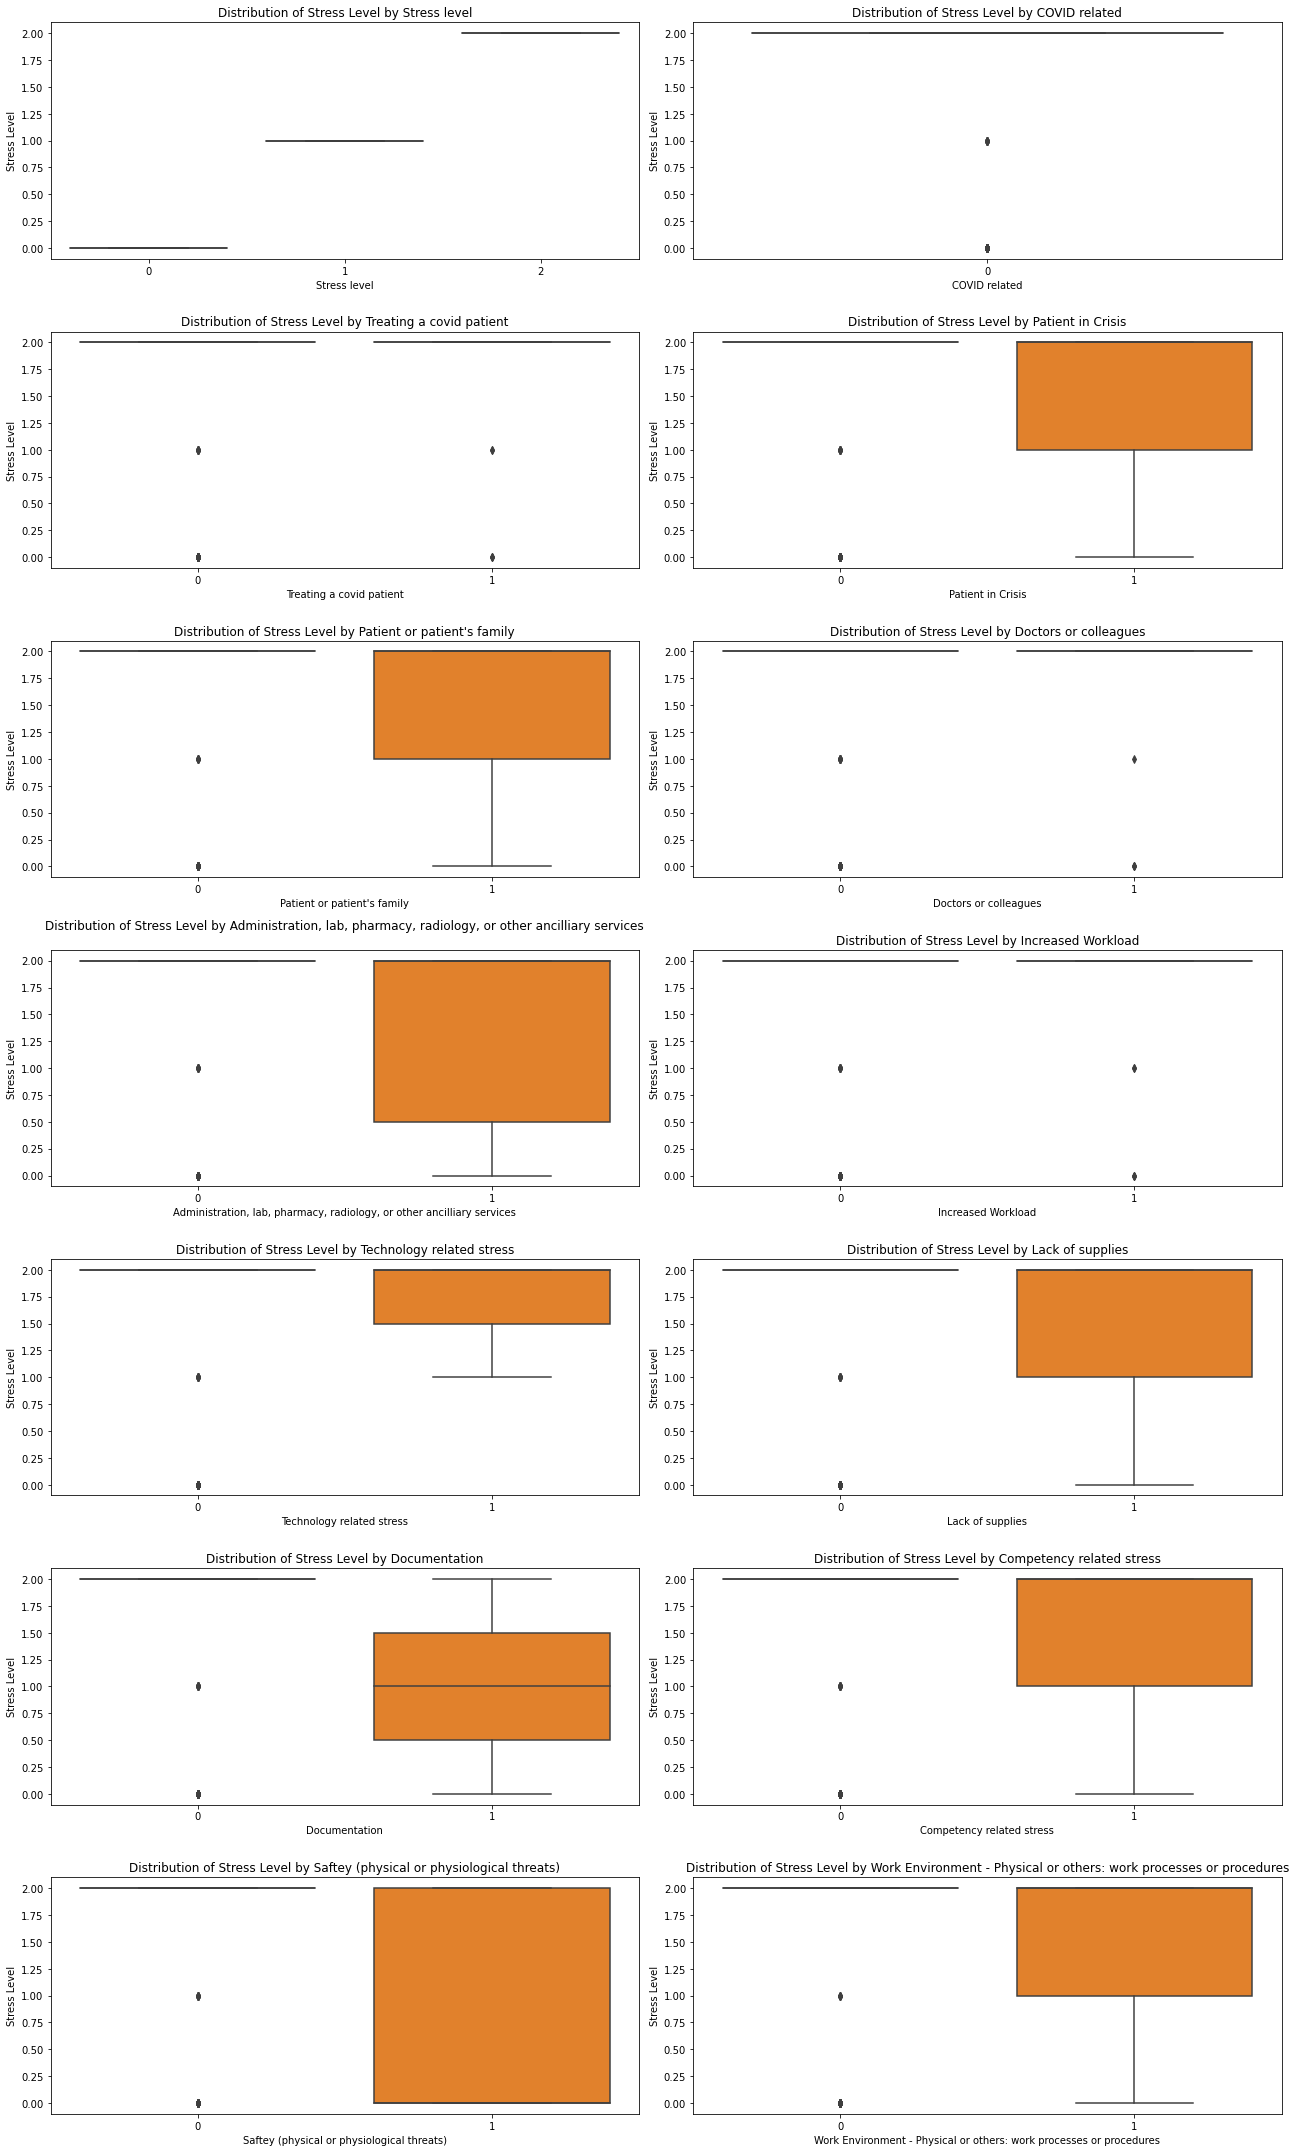

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
#Set up the figure and axes for the grid of plots
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(18, 30))
#Iterate through binary columns and axes to plot side by side
for col, ax in zip(binary_columns, axes.flatten()):
    sns.boxplot(x=train_data[col], y=train_data['Stress level'].astype(float), ax=ax)
    ax.set_title(f"Distribution of Stress Level by {col}")
    ax.set_xlabel(col)
    ax.set_ylabel('Stress Level')
#Adjust layout
plt.tight_layout()
plt.show()

In [15]:
#Feature Selection and Model Training
#Define the features and target for training data
X_train = train_data[binary_columns].astype(float)
y_train = train_data['Stress level'].astype(float)
#Cross-validation for model selection
#Initializing models
models = {
    'SVR': SVR(),
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor()
}
#Cross-validate models and store results
cv_rmse_results = {}
for name, model in models.items():
    cv_rmse = -np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring=rmse_scorer))
    cv_rmse_results[name] = cv_rmse
#Train the most promising model (SVR) on the entire training data
svr_model = SVR()
svr_model.fit(X_train, y_train)
#Prepare the test data
#Impute missing values in the test set using mode values from training set
for col in binary_columns:
    mode_value = train_data[col].mode()[0]
    test_data[col].fillna(mode_value, inplace=True)
X_test = test_data[binary_columns].astype(float)
y_test = test_data['Stress level'].astype(float)
#Evaluate the SVR model on the test data
y_pred = svr_model.predict(X_test)
test_rmse = compute_rmse(y_test, y_pred)
cv_rmse_results, test_rmse

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


({'SVR': 0.08397527793123225,
  'Linear Regression': 7.816861948574276e-16,
  'Decision Tree Regression': -0.0},
 0.08392439386414392)